In [ ]:
#%ext nb_black

## Introduction

The NEO dataset from NASA's JPL will be evaluated with unsupervised learning. The main objective of this analysis is to use clustering algorithms to find a clustering classification method that produces useful clustering information. One use in particiular that would be valuable is to utilise clustering classification for prospecting NEO's in space mining operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn import datasets, metrics

#%matplotlib inline

In [2]:
# Import data into DataFrame
df = pd.read_csv("NEO_Data.csv")

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,5,16,23,24,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Review dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25391 entries, 0 to 25390
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25391 non-null  object 
 1   spkid           25391 non-null  int64  
 2   full_name       25391 non-null  object 
 3   pdes            25391 non-null  object 
 4   name            345 non-null    object 
 5   prefix          186 non-null    object 
 6   neo             25391 non-null  object 
 7   pha             25202 non-null  object 
 8   H               25196 non-null  float64
 9   G               13 non-null     float64
 10  M1              129 non-null    float64
 11  M2              49 non-null     float64
 12  K1              129 non-null    float64
 13  K2              49 non-null     float64
 14  PC              31 non-null     float64
 15  diameter        1267 non-null   float64
 16  extent          10 non-null     object 
 17  albedo          1208 non-null  

In [4]:
# Inspect feature content
pd.set_option('max_columns', 80)
df.head(10)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,G,M1,M2,K1,K2,PC,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,H_sigma,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,producer,data_arc,first_obs,last_obs,n_obs_used,n_del_obs_used,n_dop_obs_used,condition_code,rms,two_body,A1,A2,A3,DT
0,a0000433,2000433,433 Eros (A898 PA),433,Eros,NaN,Y,N,10.40,0.46,NaN,NaN,NaN,NaN,NaN,16.840,34.4x11.2x11.2,0.250,5.27000,0.000446,0.921,0.531,NaN,S,S,NaN,0.060,JPL 658,2459000.5,59000.0,20200531.0,J2000,0.222951,1.458046,1.132973,10.830541,304.299326,178.882296,271.071733,1.783119,0.559819,2.459159e+06,2.020111e+07,643.065402,1.760617,0.148623,57.839613,3.28650,4.582,9.649700e-09,2.137400e-10,1.406300e-08,0.000001,0.000004,0.000004,0.000001,2.613900e-10,1.231000e-10,0.000003,1.414000e-07,AMO,Giorgini,46330.0,1893-10-29,2020-09-03,8767,4.0,2.0,0.0,0.28397,NaN,NaN,NaN,NaN,NaN
1,a0000719,2000719,719 Albert (A911 TB),719,Albert,NaN,Y,N,15.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.80100,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,JPL 216,2459000.5,59000.0,20200531.0,J2000,0.546558,2.638602,1.196452,11.567485,183.866947,156.176341,140.273422,4.080752,0.229955,2.458390e+06,2.018093e+07,1565.522355,4.286167,0.203482,79.189090,1.41794,3.140,2.177900e-08,2.530500e-09,5.810300e-08,0.000003,0.000016,0.000017,0.000003,3.913500e-09,3.308000e-10,0.000010,2.252000e-06,AMO,Otto Matic,39939.0,1911-10-04,2021-02-07,1882,NaN,NaN,0.0,0.39319,NaN,NaN,NaN,NaN,NaN
2,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,NaN,Y,N,13.84,-0.12,NaN,NaN,NaN,NaN,NaN,4.200,NaN,0.310,73.97000,NaN,0.832,0.436,NaN,NaN,S,NaN,NaN,JPL 360,2459200.5,59200.0,20201217.0,J2000,0.570422,2.473534,1.062575,9.393848,110.433737,350.512499,345.243769,3.884493,0.253354,2.459259e+06,2.021021e+07,1420.938218,3.890317,0.081753,31.815854,1.31479,3.221,4.073700e-08,4.761300e-09,1.021800e-07,0.000003,0.000024,0.000025,0.000007,7.477300e-09,7.315200e-10,0.000027,4.102700e-06,AMO,Otto Matic,37643.0,1918-02-03,2021-02-25,2132,NaN,NaN,0.0,0.42233,NaN,NaN,NaN,NaN,NaN
3,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,NaN,Y,N,9.30,0.30,NaN,NaN,NaN,NaN,NaN,37.675,NaN,0.238,10.29700,NaN,0.842,0.417,NaN,S,S,NaN,0.399,JPL 886,2459200.5,59200.0,20201217.0,J2000,0.533095,2.665194,1.244393,26.676147,215.544195,132.378555,50.117962,4.085995,0.226522,2.458979e+06,2.020051e+07,1589.247561,4.351123,0.343891,133.832060,1.95302,3.034,2.263300e-08,2.047200e-09,6.030500e-08,0.000004,0.000007,0.000007,0.000002,3.138600e-09,2.610000e-10,0.000010,1.831100e-06,AMO,Otto Matic,35191.0,1924-10-23,2021-02-27,6807,0.0,1.0,0.0,0.37325,NaN,NaN,NaN,NaN,NaN
4,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,17.39,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPL 104,2459000.5,59000.0,20200531.0,J2000,0.435285,1.919498,1.083969,11.876540,171.327012,26.694788,38.522411,2.755027,0.370615,2.458897e+06,2.020022e+07,971.359459,2.659437,0.107450,41.816316,2.21364,3.781,3.448700e-08,9.463600e-10,6.656900e-08,0.000005,0.000023,0.000024,0.000008,1.358300e-09,2.740800e-10,0.000022,7.183600e-07,AMO,Otto Matic,32328.0,1932-03-12,2020-09-14,552,NaN,NaN,0.0,0.45839,NaN,NaN,NaN,NaN,NaN
5,a0001566,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.34,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,0.510,2.27260,NaN,0.774,0.520,NaN,NaN,NaN,NaN,NaN,JPL 119,2459000.5,59000.0,20200531.0,J2000,0.827021,1.078169,0.186500,22.822106,87.997546,31.393339,192.083179,1.969838,0.880387,2.459191e+06,2.020121e+07,408.910857,1.119537,0.034245,13.327010,3.21481,5.298,3.106600e-08,2.793300e-09,3.347700e-08,0.000010,0.000004,0.000006,0.000006,5.103400e-09,3.421300e-09,0.000008,1.589100e-06,APO,Otto Matic,26002.0,1949-07-01,2020-09-08,1052,10.0,13.0,0.0,0.34334,NaN,NaN,-3.052891e-15,NaN,NaN
6,a0001580,2001580,1580 Betulia (1950 KA),1580,Betulia,NaN,Y,N,14.70,0.00,NaN,NaN,NaN,NaN

In [5]:
# Drop features not useful for analysis
df = df.drop(["class", "pha", "id", "spkid", "full_name", "neo", "pdes", "name", "prefix", "G", "M1", "M2", "K1", "K2", "PC", "extent", "GM", "IR", "H_sigma", "diameter_sigma", "orbit_id", "epoch", "epoch_mjd", "epoch_cal", "equinox", "tp", "tp_cal", "diameter", "albedo", "rot_per", "BV", "UB", "spec_B", "spec_T", "n_del_obs_used", "n_dop_obs_used", "two_body", "A1", "A2", "A3", "DT", "producer", "first_obs", "last_obs", "n_obs_used"], axis = 1)

In [6]:
# Review Dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25391 entries, 0 to 25390
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   H               25196 non-null  float64
 1   e               25391 non-null  float64
 2   a               25391 non-null  float64
 3   q               25391 non-null  float64
 4   i               25391 non-null  float64
 5   om              25391 non-null  float64
 6   w               25391 non-null  float64
 7   ma              25391 non-null  float64
 8   ad              25391 non-null  float64
 9   n               25391 non-null  float64
 10  per             25391 non-null  float64
 11  per_y           25391 non-null  float64
 12  moid            25382 non-null  float64
 13  moid_ld         25382 non-null  float64
 14  moid_jup        25290 non-null  float64
 15  t_jup           25391 non-null  float64
 16  sigma_e         25380 non-null  float64
 17  sigma_a         25380 non-null 

In [7]:
df.head(5)

,H,e,a,q,i,om,w,ma,ad,n,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,data_arc,condition_code,rms
0,10.40,0.222951,1.458046,1.132973,10.830541,304.299326,178.882296,271.071733,1.783119,0.559819,643.065402,1.760617,0.148623,57.839613,3.28650,4.582,9.649700e-09,2.137400e-10,1.406300e-08,0.000001,0.000004,0.000004,0.000001,2.613900e-10,1.231000e-10,0.000003,1.414000e-07,46330.0,0.0,0.28397
1,15.51,0.546558,2.638602,1.196452,11.567485,183.866947,156.176341,140.273422,4.080752,0.229955,1565.522355,4.286167,0.203482,79.189090,1.41794,3.140,2.177900e-08,2.530500e-09,5.810300e-08,0.000003,0.000016,0.000017,0.000003,3.913500e-09,3.308000e-10,0.000010,2.252000e-06,39939.0,0.0,0.39319
2,13.84,0.570422,2.473534,1.062575,9.393848,110.433737,350.512499,345.243769,3.884493,0.253354,1420.938218,3.890317,0.081753,31.815854,1.31479,3.221,4.073700e-08,4.761300e-09,1.021800e-07,0.000003,0.000024,0.000025,0.000007,7.477300e-09,7.315200e-10,0.000027,4.102700e-06,37643.0,0.0,0.42233
3,9.30,0.533095,2.665194,1.244393,26.676147,215.544195,132.378555,50.117962,4.085995,0.226522,1589.247561,4.351123,0.343891,133.832060,1.95302,3.034,2.263300e-08,2.047200e-09,6.030500e-08,0.000004,0.000007,0.000007,0.000002,3.138600e-09,2.610000e-10,0.000010,1.831100e-06,35191.0,0.0,0.37325
4,17.39,0.435285,1.919498,1.083969,11.876540,171.327012,26.694788,38.522411,2.755027,0.370615,971.359459,2.659437,0.107450,41.816316,2.21364,3.781,3.448700e-08,9.463600e-10,6.656900e-08,0.000005,0.000023,0.000024,0.000008,1.358300e-09,2.740800e-10,0.000022,7.183600e-07,32328.0,0.0,0.45839


In [8]:
df.isna().mean()

H                 0.007680
e                 0.000000
a                 0.000000
q                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
ma                0.000000
ad                0.000000
n                 0.000000
per               0.000000
per_y             0.000000
moid              0.000354
moid_ld           0.000354
moid_jup          0.003978
t_jup             0.000000
sigma_e           0.000433
sigma_a           0.000433
sigma_q           0.000433
sigma_i           0.000433
sigma_om          0.000433
sigma_w           0.000433
sigma_ma          0.000433
sigma_ad          0.000433
sigma_n           0.000433
sigma_tp          0.000433
sigma_per         0.000433
data_arc          0.008980
condition_code    0.000433
rms               0.000315
dtype: float64

In [9]:
# Drop small number of nulls
df = df.dropna()

In [10]:
# Check out the overall statistics
df.describe()

,H,e,a,q,i,om,w,ma,ad,n,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,data_arc,condition_code,rms
count,24971.000000,24971.000000,24971.000000,24971.000000,24971.000000,24971.000000,24971.000000,24971.000000,24971.000000,24971.000000,2.497100e+04,24971.000000,2.497100e+04,24971.000000,24971.000000,24971.000000,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,2.497100e+04,24971.000000,24971.000000,24971.000000
mean,22.963339,0.442264,1.778201,0.915085,12.464808,173.415186,182.035650,175.861240,2.641317,0.520098,9.926342e+02,2.717684,9.266544e-02,36.062609,2.690652,4.252798,3.732571e-03,2.159542e-02,1.877974e-03,8.753041e-02,1.146003e-01,2.958771e-01,6.766854e-01,3.577020e-02,3.955681e-03,1.156975e+00,5.158999e+01,1401.900004,5.015338,0.480894
std,2.943887,0.177074,2.329314,0.231736,11.087191,103.647876,104.377440,122.554621,4.641281,0.281345,1.534744e+04,42.018990,1.017516e-01,39.598683,0.966270,1.069505,8.455745e-02,7.550461e-01,4.287180e-02,1.970661e+00,3.056392e+00,6.037218e+00,1.336362e+01,1.376194e+00,9.488704e-02,3.488909e+01,5.536660e+03,3061.951388,3.242249,0.124875
min,9.300000,0.002846,0.555425,0.070511,0.013518,0.025992,0.007924,0.005210,0.653740,0.000149,1.511945e+02,0.413948,4.544120e-07,0.000177,0.000778,-1.205000,7.690300e-10,4.026100e-11,9.401900e-10,1.901100e-07,2.823900e-07,5.732200e-07,2.103800e-07,4.846400e-11,2.856800e-11,2.687500e-07,2.335000e-08,1.000000,0.000000,0.037189
25%,20.700000,0.311336,1.306606,0.786294,4.555753,83.345639,92.210163,53.444982,1.699990,0.303220,5.455262e+02,1.493569,1.545760e-02,6.015634,1.945610,3.421000,5.032150e-07,1.337250e-07,5.332700e-07,3.649900e-05,5.310150e-05,1.137100e-04,1.692800e-04,1.969050e-07,5.193750e-08,2.312800e-04,9.797250e-05,7.000000,1.000000,0.396390
50%,23.200000,0.455850,1.709496,0.964989,8.776845,172.703429,183.863172,171.877177,2.471957,0.440963,8.163957e+02,2.235170,5.205970e-02,20.260073,2.831520,4.012000,1.441300e-04,2.867500e-04,2.246000e-05,1.771400e-03,5.007700e-04,1.641500e-03,4.382500e-02,3.906100e-04,1.472200e-04,1.744100e-02,1.938300e-01,29.000000,6.000000,0.471480
75%,25.200000,0.568216,2.194306,1.068242,17.659230,256.062893,271.996770,298.338697,3.391781,0.659913,1.187256e+03,3.250529,1.413785e-01,55.020271,3.529210,4.878000,8.796700e-04,2.645750e-03,1.755350e-04,1.390050e-02,3.668100e-03,1.221250e-02,2.245600e-01,3.805750e-03,1.034850e-03,2.150150e-01,1.895300e+00,1378.000000,8.000000,0.554080
max,32.950000,0.996476,352.628376,1.299988,165.540886,359.977966,359.982032,359.998040,704.014132,2.381039,2.418657e+06,6621.922401,7.077220e-01,275.424171,4.621490,9.987000,8.411300e+00,8.466800e+01,3.433200e+00,1.489500e+02,2.751700e+02,5.370100e+02,1.215800e+03,1.690400e+02,8.671700e+00,4.949200e+03,8.711000e+05,46330.000000,9.000000,1.752000


In [11]:
# Used for quicker development
#df = df.sample(5000, random_state=42)
#df.shape

In [12]:
# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled = pd.DataFrame(scaled, columns = df.columns, index = df.index)
scaled.head()

,H,e,a,q,i,om,w,ma,ad,n,per,per_y,moid,moid_ld,moid_jup,t_jup,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,data_arc,condition_code,rms
0,-4.267688,-1.238561,-0.137449,0.940257,-0.147404,1.262802,-0.030212,0.776898,-0.184909,0.141185,-0.022777,-0.022777,0.549954,0.549954,0.616660,0.307814,-0.044143,-0.028602,-0.043805,-0.044417,-0.037495,-0.049009,-0.050637,-0.025993,-0.041689,-0.033162,-0.009318,14.673322,-1.546901,-1.577003
1,-2.531853,0.588999,0.369387,1.214191,-0.080935,0.100841,-0.247753,-0.290389,0.310144,-1.031289,0.037329,0.037329,1.089111,1.089111,-1.317166,-1.040501,-0.044143,-0.028602,-0.043804,-0.044416,-0.037491,-0.049007,-0.050637,-0.025993,-0.041689,-0.033162,-0.009318,12.586049,-1.546901,-0.702348
2,-3.099141,0.723770,0.298520,0.636466,-0.276988,-0.607660,1.614144,1.382126,0.267857,-0.948121,0.027908,0.027908,-0.107247,-0.107247,-1.423919,-0.964763,-0.044143,-0.028602,-0.043803,-0.044416,-0.037488,-0.049006,-0.050637,-0.025993,-0.041689,-0.033161,-0.009318,11.836186,-1.546901,-0.468989
3,-4.641351,0.512964,0.380803,1.421071,1.281806,0.406471,-0.475755,-1.026039,0.311273,-1.043491,0.038875,0.038875,2.469057,2.469057,-0.763396,-1.139614,-0.044143,-0.028602,-0.043804,-0.044416,-0.037494,-0.049009,-0.050637,-0.025993,-0.041689,-0.033162,-0.009318,11.035373,-1.546901,-0.862031
4,-1.893228,-0.039414,0.060662,0.728792,-0.053059,-0.020147,-1.488291,-1.120656,0.024500,-0.531326,-0.001386,-0.001386,0.145303,0.145303,-0.493673,-0.441146,-0.044143,-0.028602,-0.043804,-0.044415,-0.037489,-0.049006,-0.050637,-0.025993,-0.041689,-0.033162,-0.009318,10.100330,-1.546901,-0.180214


In [13]:
# Dimension Reduction - Principal Component Analysis
pca = PCA(n_components=2)

In [14]:
pca_components = pca.fit_transform(scaled)

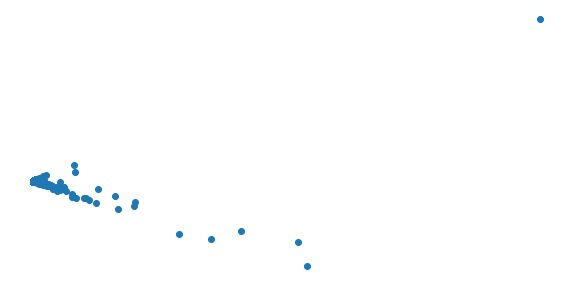

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It's difficult to find much cluster meaning in this 2D representation. Even so, we can see there is some interpretable structure in the data points. This porovides an indication that even by reducing all of the features down to two dimensions PCA is retaining enough data to identify clusters.   

Next, I evaluate the performance of selecting different numbers of principal components so I can utilise dimension reduction most effectivly for the upcoming clustering.

In [16]:
pca = PCA()
pca.fit(scaled)

PCA()

In [17]:
# Variance explained by each component
pca.explained_variance_

array([7.17094391e+00, 5.33529219e+00, 3.99273189e+00, 2.87341228e+00,
       1.72094651e+00, 1.12308899e+00, 1.07469932e+00, 1.02752021e+00,
       9.56445427e-01, 9.10535810e-01, 8.91430665e-01, 7.26643102e-01,
       5.85142935e-01, 3.35445724e-01, 3.20522637e-01, 2.08480456e-01,
       1.93286549e-01, 1.54674176e-01, 1.32384979e-01, 1.17673108e-01,
       6.59282900e-02, 3.94338138e-02, 2.24425847e-02, 2.00913491e-02,
       1.40199772e-03, 4.06327720e-04, 1.96195520e-04, 3.06670037e-30,
       3.50081352e-32, 3.38355613e-32])

In [18]:
# Variance explained by each component (as a percentage)
pca.explained_variance_ratio_

array([2.39021891e-01, 1.77835951e-01, 1.33085733e-01, 9.57765737e-02,
       5.73625864e-02, 3.74348006e-02, 3.58218762e-02, 3.42493020e-02,
       3.18802375e-02, 3.03499782e-02, 2.97131655e-02, 2.42204668e-02,
       1.95039834e-02, 1.11810763e-02, 1.06836600e-02, 6.94907024e-03,
       6.44262695e-03, 5.15559939e-03, 4.41265593e-03, 3.92227985e-03,
       2.19752166e-03, 1.31440782e-03, 7.48056199e-04, 6.69684817e-04,
       4.67313858e-05, 1.35437149e-05, 6.53958875e-06, 1.02219252e-31,
       1.16689111e-33, 1.12780688e-33])

In [19]:
# Cumulative explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.23902189, 0.41685784, 0.54994358, 0.64572015, 0.70308274,
       0.74051754, 0.77633941, 0.81058871, 0.84246895, 0.87281893,
       0.9025321 , 0.92675256, 0.94625655, 0.95743762, 0.96812128,
       0.97507035, 0.98151298, 0.98666858, 0.99108123, 0.99500351,
       0.99720104, 0.99851544, 0.9992635 , 0.99993319, 0.99997992,
       0.99999346, 1.        , 1.        , 1.        , 1.        ])

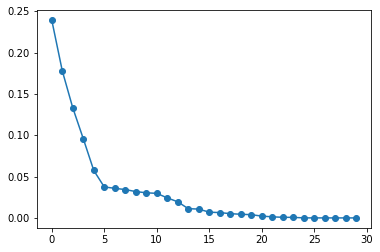

In [20]:
# Scree plot
plt.plot(pca.explained_variance_ratio_, "-o")
plt.show()

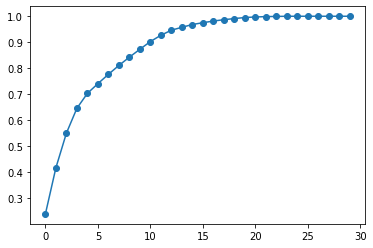

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), "-o")
plt.show()

It looks like using 10 principal components will account for the majority of the variance in the data.

In [22]:
pca = PCA(n_components = 10)
components = pca.fit_transform(scaled)

components = pd.DataFrame(components, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"], index=scaled.index)
components.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-0.132505,0.612524,-4.410440,7.161782,5.289144,4.278499,4.019761,3.425320,-3.524153,0.044935
1,0.488963,1.451979,-5.826169,4.234614,4.453119,2.987397,4.006555,2.098600,-2.723168,0.114254
2,0.345039,1.268784,-4.916424,3.480906,5.476480,2.680156,4.255070,1.069848,-3.467785,0.220742
3,0.700289,1.658717,-7.271817,5.733632,3.415459,1.680471,2.674488,2.275711,-1.982817,0.120507
4,0.085055,0.786838,-3.628189,3.638850,3.950448,2.918596,3.489597,1.663075,-1.798222,0.047077


In [23]:
# Compute the distance matrix
#dist_mat = squareform(pdist(components, metric = "euclidean"))
#dist_mat = pd.DataFrame(dist_mat, index = scaled.index, columns = components.index)
#dist_mat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,25166,25167,25168,25169,25170,25171,25172,25173,25174,25175,25176,25177,25178,25179,25180,25181,25182,25183,25184,25185,25186,25187,25188,25189,25190,25191,25192,25193,25194,25195,25196,25197,25198,25199,25200,25201,25202,25203,25204,25205
0,0.000000,4.054150,4.763517,5.271469,4.807032,7.891161,6.986515,5.760077,3.854670,5.379575,5.830027,6.370666,8.286369,7.742088,6.809716,8.667056,6.159490,6.149130,6.998921,5.532297,8.447583,7.356133,6.860993,7.147922,8.299532,8.552628,6.780604,8.580189,8.748099,6.494746,7.914884,9.353672,8.262917,9.614068,7.901650,9.059248,8.191714,8.088158,7.545673,8.349127,...,13.688708,14.084844,13.801821,13.510221,13.622403,13.520761,13.954480,13.568388,13.591388,14.208488,13.791123,13.853982,13.785113,13.941954,14.025667,14.121201,14.184141,13.973625,14.010473,14.138956,13.881930,14.525970,13.909984,13.488069,13.806263,13.858977,13.563900,13.094735,14.717405,13.627984,14.186651,13.927528,14.314295,13.707894,14.200674,13.415653,14.267831,13.383161,13.742461,8.980094
1,4.054150,0.000000,2.068219,3.092423,2.714034,7.247543,4.478726,5.410739,2.321216,4.821027,4.703976,3.837430,6.375778,6.790158,4.906359,5.614250,3.609544,3.718717,5.749537,4.300358,6.844933,4.270470,4.330006,7.045294,7.551527,8.294535,5.543112,7.615243,6.851622,4.291507,5.185827,6.587527,5.657545,9.264471,5.545619,6.227659,5.617819,6.640531,6.093040,6.949739,...,11.888713,12.201344,11.476152,11.508295,11.926188,12.125553,11.790975,11.929296,12.353043,12.212675,12.664869,11.999790,12.668811,12.708347,11.990497,12.405173,12.548954,13.064265,12.070194,13.358349,11.593263,11.914450,12.819415,11.549278,11.726843,12.649415,12.107771,11.527688,12.165208,11.622488,13.144140,11.660508,12.190579,11.746811,11.815349,12.086929,11.781803,11.746416,11.865114,6.052872
2,4.763517,2.068219,0.000000,4.723939,2.850518,6.353616,4.562448,5.294100,2.234702,4.686232,3.309616,4.461559,6.068596,6.557420,4.632473,5.411516,4.701765,3.634212,5.630090,5.174119,6.756747,4.949297,4.076041,6.776778,6.955783,7.926137,5.017346,7.528254,6.404078,2.845322,5.170026,5.811743,5.441339,8.762707,6.293994,6.239395,5.872022,6.408010,6.345669,7.696677,...,11.432324,11.672601,11.300055,11.155705,11.906612,11.944089,11.393203,11.982058,12.305612,11.797571,12.386861,11.817889,12.509545,12.504777,11.670323,11.963773,12.121921,12.667396,11.866940,13.226492,11.374819,11.442154,12.807355,11.837710,11.225890,12.520384,11.815829,11.422487,11.753365,11.553043,12.732778,11.167211,11.987524,11.773638,11.551169,12.163440,11.290786,11.464601,11.526076,5.540226
3,5.271469,3.092423,4.723939,0.000000,4.658452,8.195938,4.335577,6.600637,4.375465,6.092506,6.652737,4.206016,6.126161,7.149095,4.953306,6.444430,3.629831,4.827383,6.777190,3.810243,7.138535,4.402889,5.975605,7.676884,8.494653,8.588898,7.398714,7.403807,7.700613,6.599545,6.048403,7.241387,6.214221,10.215954,5.677912,6.922948,6.039698,7.114721,6.659739,6.355092,...,12.645835,12.934754,11.791895,12.135505,12.191246,12.621642,12.416214,12.163640,12.790338,12.859415,13.196532,12.626004,13.359268,13.099307,12.232463,13.085295,13.302849,13.371270,12.840598,13.735627,12.333828,12.701072,13.249674,11.129012,12.329201,12.812045,12.814780,12.104454,12.851119,11.956964,13.796716,12.357196,12.832039,11.937309,12.403169,12.322560,12.332254,12.119363,12.474261,7.502691
4,4.807032,2.714034,2.850518,4.658452,0.000000,5.655575,3.725192,3.119589,1.718550,2.797675,3.319565,2.866656,5.169950,4.697294,4.002053,4.008600,2.830856,1.897216,3.353416,3.360564,5.121974,3.482956,2.195013,4.868338,5.223507,6.287115,4.095345,5.866596,4.543496,3.467908,3.301258,5.464444,4.154691,6.722384,3.928114,4.512070,3.857382,4.523246,4.071571,5.265460,...,9.587616,9.891426,9.677847,9.458046,9.721727,9.809032,9.685854,9.738273,10.120252,9.943513,10.275155,9.742747,10.161652,10.481947,9.850510,10.233406,10.120538,10.682664,9.714149,10.850430,9.582592,9.943635,10.371554,9.

### DBScan Clustering

In [24]:
# Perform clustering
clusters = DBSCAN(eps = 0.9, min_samples = 11, metric = "euclidean", n_jobs = -1)
clusters.fit(components)

DBSCAN(eps=0.9, min_samples=11, n_jobs=-1)

In [25]:
# Assign labels to the dataframe
df["label"] = clusters.labels_
df["label"] = "Cluster: " + df["label"].astype(str)

In [26]:
dbscan_clusters = df[df["label"] != "Cluster: -1"]
dbscan_clusters["label"].value_counts()

Cluster: 2     9564
Cluster: 0       63
Cluster: 4       32
Cluster: 6       25
Cluster: 7       19
Cluster: 12      15
Cluster: 14      12
Cluster: 5       12
Cluster: 1       11
Cluster: 11      11
Cluster: 3       11
Cluster: 15       9
Cluster: 16       8
Cluster: 8        8
Cluster: 10       7
Cluster: 9        6
Cluster: 13       4
Name: label, dtype: int64

Since we do not have a ground truth to compare clusters to at the moment, I will use the silhouette coefficient for evaluating the clustering.

In [102]:
epsilon = 0.6
max_samples = 15
silhouettes = []
for samples in range(1, max_samples + 1):
    labels = DBSCAN(eps = epsilon, min_samples = samples, metric = "euclidean", n_jobs = -1).fit_predict(components)
    silhouette = metrics.silhouette_score(components, labels, metric="euclidean")
    silhouettes.append(silhouette)
#silhouettes = pd.DataFrame(silhouettes, columns=["min_samples", "silhouette_score"])
plt.plot(silhouettes, "-o")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [79]:
print(silhouettes)

[-0.019658540373926642, 0.28408394409198784, 0.420870122408154, 0.8073626343405333, 0.79896294971942, 0.7943258020306279, 0.7943258020306279, 0.787512895613985, 0.7811938967512134, 0.7771651192286531]


* eps = 1, min_samp = 25, sil = 0.0618
* eps = 1.1, min_samp = 22, sil = 0.1229
* eps = 1.2, min_samp = 19, sil = 0.1716
* eps = 1.3, min_samp = 12, sil = 0.2536
* eps = 1.4, min_samp = 10, sil = 0.3241
* eps = 1.5, min_samp = 9, sil = 0.4059
* eps = 1.6, min_samp = 7, sil = 0.4059
* eps = 1.7, min_samp = 6, sil = 0.5400
* eps = 1.8, min_samp = 6, sil = 0.5888
* eps = 1.9, min_samp = 6, sil = 0.6336
* eps = 2.0, min_samp = 6, sil = 0.6653
* eps = 2.1, min_samp = 7, sil = 0.6952
* eps = 2.2, min_samp = 4, sil = 0.7424
* eps = 2.3, min_samp = 4, sil = 0.7627
* eps = 2.4, min_samp = 4, sil = 0.7960
* eps = 2.5, min_samp = 4, sil = 0.8074
* eps = 3.0, min_samp = 3, sil = 0.8074
* eps = 3.5, min_samp = 4, sil = 0.8074

In [99]:
params = [[1, 25], [1.1, 22], [1.2, 19], [1.3, 12], [1.4, 10], [1.5, 9], [1.6, 7], [1.7, 6], [1.8, 6], [1.9, 6], [2, 6], [2.1, 7], [2.2, 4], [2.3, 4], [2.4, 4], [2.5, 4]]

In [100]:
for param in params:
    clusters = DBSCAN(eps = param[0], min_samples = param[1], metric = "euclidean", n_jobs = -1)
    clusters.fit(components)
    
    df["label"] = clusters.labels_
    df["label"] = "Cluster: " + df["label"].astype(str)
    
    dbscan_clusters = df[df["label"] != "Cluster: -1"]
    print(dbscan_clusters["label"].value_counts())

Cluster: 0    9146
Name: label, dtype: int64
Cluster: 0    13133
Name: label, dtype: int64
Cluster: 0    17068
Name: label, dtype: int64
Cluster: 0    21175
Name: label, dtype: int64
Cluster: 0    22768
Name: label, dtype: int64
Cluster: 0    23612
Name: label, dtype: int64
Cluster: 2    24118
Cluster: 1        7
Cluster: 0        7
Name: label, dtype: int64
Cluster: 0    24396
Name: label, dtype: int64
Cluster: 0    24530
Name: label, dtype: int64
Cluster: 0    24628
Name: label, dtype: int64
Cluster: 0    24686
Name: label, dtype: int64
Cluster: 0    24732
Name: label, dtype: int64
Cluster: 0    24791
Name: label, dtype: int64
Cluster: 0    24813
Name: label, dtype: int64
Cluster: 0    24845
Name: label, dtype: int64
Cluster: 0    24855
Name: label, dtype: int64


In [82]:
# Perform clustering
clusters = DBSCAN(eps = 2.5, min_samples = 4, metric = "euclidean", n_jobs = -1)
clusters.fit(components)

DBSCAN(eps=2.5, min_samples=4, n_jobs=-1)

DBSCAN(eps=2.5, min_samples=4, n_jobs=-1)

In [83]:
# Assign labels to the dataframe
df["label"] = clusters.labels_
df["label"] = "Cluster: " + df["label"].astype(str)

In [84]:
dbscan_clusters = df[df["label"] != "Cluster: -1"]
dbscan_clusters["label"].value_counts()

Cluster: 0    24855
Name: label, dtype: int64

Possible Improvements:
* Impliment method for automatically determining the optimal value for Eps (along with whatever other hard to tune hyperparameters are being used).
* Obtain asteroid prospecting data so that we have exsisting labels or a "ground truth" to tune the performance of the model.
* Try additional dimension reduction and feature engineering to improve clustering performance.
* Try additional clustering algorithms and compare results.